In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from ast import literal_eval
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df1 = pd.read_csv("C:/Users/Dell/Desktop/archive (5)/tmdb_5000_credits.csv") # change this to the path where you
df2 = pd.read_csv("C:/Users/Dell/Desktop/archive (5)/tmdb_5000_movies.csv") # download the movie datasets

In [3]:
df1.head(5) # first five parts of the dataset 1

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
df2.head(5) # same dataset2

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
# calculating the rating using IMDB's ratings score PREPROCESSING
c = df2['vote_average'].mean()
m = df2['vote_count'].quantile(0.9)
q_movies = df2.copy().loc[df2['vote_count'] >= m] # extracting films that aren't rated horribly

In [6]:
def weighted_rating(df, m=m, C=c): # PREPROCESSING MORE
    v = df['vote_count']
    R = df['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

q_movies['score'] = q_movies.apply(weighted_rating, axis=1)
q_movies = q_movies.sort_values('score', ascending=False)
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10) 

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


Text(0.5, 1.0, 'Popular Movies')

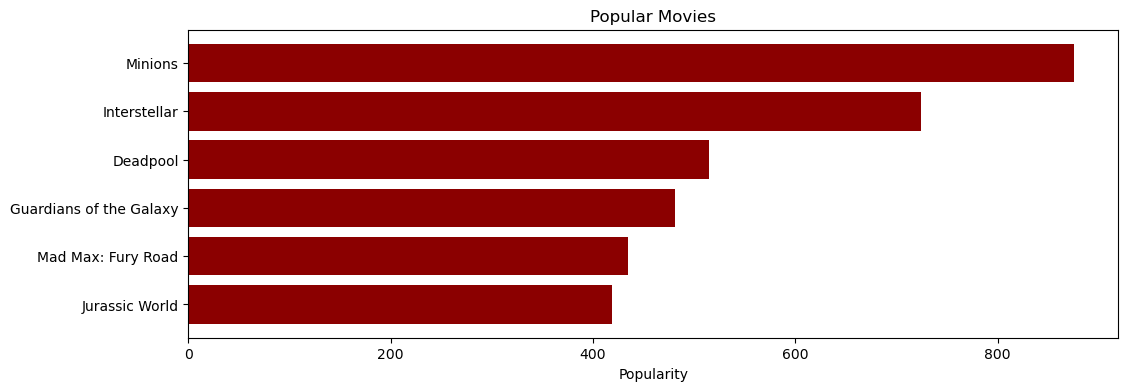

In [7]:
popularity = df2.sort_values('popularity', ascending=False) # NOT PREPROCESSING BUT IDK WHY WE USED THIS U CAN OMIT
plt.figure(figsize=(12,4))

plt.barh(popularity['title'].head(6),popularity['popularity'].head(6), align='center',
        color='darkred')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

In [8]:
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [9]:
tfidf = TfidfVectorizer(stop_words='english') # THIS IS A TRAINING MODEL

df2['overview'] = df2['overview'].fillna('')

tfidf_matrix = tfidf.fit_transform(df2['overview'])

tfidf_matrix.shape

(4803, 20978)

In [10]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix) # ALSO A TRAINING MODEL

In [11]:
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates() # MODEL

In [12]:
def get_recommendations(title, cosine_sim=cosine_sim): # MODEL
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return df2['title'].iloc[movie_indices]

In [13]:
get_recommendations('Interstellar')

1709         Space Pirate Captain Harlock
300                     Starship Troopers
4353                    The Green Inferno
220                            Prometheus
2260                      All Good Things
268                         Stuart Little
1352                              Gattaca
4176    Battle for the Planet of the Apes
2648                       Winnie Mandela
634                            The Matrix
Name: title, dtype: object

In [14]:
df2 = pd.concat([df2, df1[['cast', 'crew']]], axis=1) # PREPROCESSING

In [15]:
features = ['cast', 'crew', 'keywords', 'genres'] # PREPROCESSING
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

In [16]:
def get_director(x): # PREPROCESSING
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [17]:
def get_list(x): # PREPROCESSING
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) > 3:
            names = names[:3]
        return names

    return []

In [18]:
df2['director'] = df2['crew'].apply(get_director) # PREPROCESSING

features = ['cast', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [19]:
df2[['title', 'cast', 'director', 'keywords', 'genres']].head(5) # PREPROCESSING

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


In [20]:
def clean_data(x): # PREPROCESSING
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [21]:
features = ['cast', 'keywords', 'director', 'genres'] # PREPROCESSING

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

In [22]:
def create_soup(x): # THE REST IS MODEL
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1)

In [23]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

In [24]:
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [25]:
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title'])

In [28]:
get_recommendations('The Hunger Games', cosine_sim2)

102     The Hunger Games: Mockingjay - Part 2
200     The Hunger Games: Mockingjay - Part 1
183           The Hunger Games: Catching Fire
661                Zathura: A Space Adventure
193                               After Earth
91               Independence Day: Resurgence
101                        X-Men: First Class
256                                 Allegiant
294                                      Epic
1326                             The 5th Wave
Name: title, dtype: object